(image-segmentation:relabel-sequential)=
# Sequentielle Objektneu(markierung)

Wie oben erwähnt, kann es je nach Anwendungsfall wichtig sein, Objekte in einem Bild sequentiell zu markieren. Es könnte zum Beispiel sein, dass ein Nachbearbeitungsalgorithmus für Etikettbilder abstürzt, wenn wir ein Etikettbild mit fehlenden Etiketten übergeben. Daher sollten wir wissen, wie man ein Bild sequentiell neu etikettiert.

In [1]:
import numpy as np
from skimage.io import imread
from skimage.segmentation import relabel_sequential
import pyclesperanto_prototype as cle

Unser Ausgangspunkt ist ein Etikettbild mit den Etiketten 1-8, wobei einige Etiketten nicht vorhanden sind:

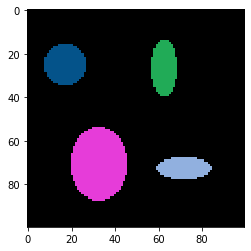

In [2]:
label_image = imread("../../data/label_map_with_index_gaps.tif")
cle.imshow(label_image, labels=True)

Wenn wir die maximale Intensität im Bild messen, können wir sehen, dass dieses Etikettbild mit 4 Etiketten offensichtlich nicht sequentiell etikettiert ist.

In [3]:
np.max(label_image)

8

Wir können die Funktion `unique` verwenden, um herauszufinden, welche Etiketten vorhanden sind:

In [4]:
np.unique(label_image)

array([0, 1, 2, 4, 8], dtype=uint8)

## Sequentielle Etikettierung
Wir können dieses Bild jetzt neu etikettieren und diese Lücken mit der [Funktion `relabel_sequential()` von scikit-image](https://scikit-image.org/docs/dev/api/skimage.segmentation.html#skimage.segmentation.relabel_sequential) entfernen. Wir geben `_` als zusätzliche Rückgabevariablen ein, da wir nicht an ihnen interessiert sind. Dies ist notwendig, weil die Funktion `relabel_sequential` drei Dinge zurückgibt, wir aber nur das erste benötigen.

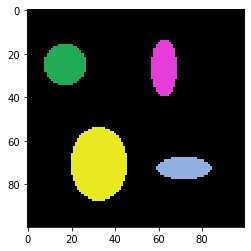

In [5]:
relabeled, _, _ = relabel_sequential(label_image)

cle.imshow(relabeled, labels=True)

Danach sollten die eindeutigen Etiketten sequentiell sein:

In [6]:
np.unique(relabeled)

array([0, 1, 2, 3, 4], dtype=uint8)

Auch pyclesperanto hat eine Funktion zum sequentiellen Neu-Etikettieren von Etikettbildern. Das Ergebnis sollte identisch mit dem Ergebnis in scikit-image sein. Es gibt nur keine zusätzlichen Werte zurück.

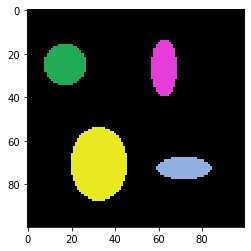

In [7]:
relabeled1 = cle.relabel_sequential(label_image)

cle.imshow(relabeled1, labels=True)

## Rückgängigmachen der sequentiellen Etikettierung
In manchen Fällen wenden wir eine Operation auf ein Etikettbild an, die ein neues Etikettbild mit weniger Etiketten zurückgibt, die sequentiell etikettiert sind, aber die Etikettenidentität geht verloren. Dies geschieht zum Beispiel, wenn Etiketten aus dem Etikettbild ausgeschlossen werden, die zu klein sind.

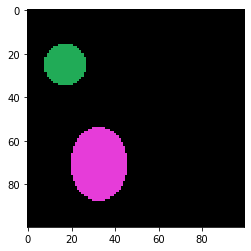

In [8]:
large_labels = cle.exclude_small_labels(relabeled, maximum_size=260)

cle.imshow(large_labels, labels=True, max_display_intensity=4)

In [9]:
np.unique(large_labels)

array([0, 1, 2], dtype=uint32)

Um die ursprünglichen Etikettenidentitäten wiederherzustellen, müssen wir ein Binärbild, das die verbleibenden Etiketten repräsentiert, mit dem ursprünglichen Etikettbild multiplizieren.

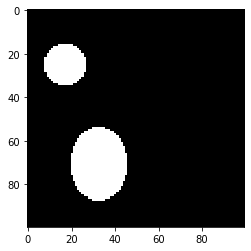

In [10]:
binary_remaining_labels = large_labels > 0

cle.imshow(binary_remaining_labels)

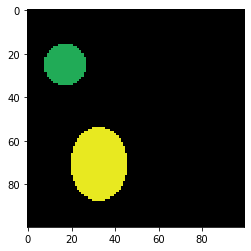

In [11]:
large_labels_with_original_identity = binary_remaining_labels * relabeled

cle.imshow(large_labels_with_original_identity, labels=True, max_display_intensity=4)

In [12]:
np.unique(large_labels_with_original_identity)

array([0., 1., 3.], dtype=float32)

Wir können nun schließen, dass Etiketten mit den Identitäten 2 und 4 zu klein waren und daher ausgeschlossen wurden.